# K-Means Clustering from Scratch

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("marks_data.xlsx")
df.head(5)

,STD_ID,Math,Science
0,1,52,82
1,2,53,86
2,3,75,88
3,4,75,76
4,5,59,92


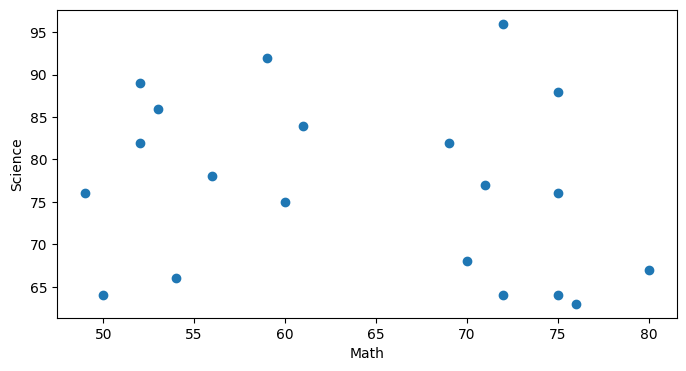

In [3]:
plt.figure(figsize=(8,4))
plt.scatter(df["Math"],df["Science"])
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [4]:
k= 2
c1= np.random.randint(40,99,2)
c1

array([75, 93], dtype=int32)

In [5]:
c2= np.random.randint(40,99,2)
c1,c2

(array([75, 93], dtype=int32), array([75, 48], dtype=int32))

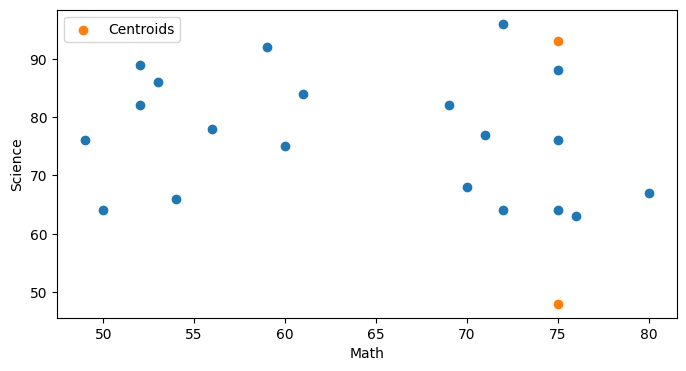

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(df["Math"],df["Science"])
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids")
plt.xlabel("Math")
plt.ylabel("Science")
plt.legend()
plt.show()

In [7]:
dist_c1= np.sqrt(np.square(c1[0]-df["Math"])+np.square(c1[1]-df["Science"]))
dist_c1

0     25.495098
1     23.086793
2      5.000000
3     17.000000
4     16.031220
5     38.288379
6     31.064449
7     30.016662
8     29.000000
9     34.205263
10    29.154759
11    16.492423
12    23.345235
13    24.207437
14    16.643317
15    23.430749
16    12.529964
17     4.242641
18    26.476405
19    25.495098
dtype: float64

In [8]:
dist_c2= np.sqrt(np.square(c2[0]-df["Math"])+np.square(c2[1]-df["Science"]))
dist_c2

0     41.048752
1     43.908997
2     40.000000
3     28.000000
4     46.818800
5     29.681644
6     38.209946
7     15.033296
8     16.000000
9     27.658633
10    16.278821
11    29.274562
12    47.010637
13    35.510562
14    38.626416
15    30.886890
16    34.525353
17    48.093659
18    19.646883
19    20.615528
dtype: float64

In [9]:
df["Cluster1"]= dist_c1
df["Cluster2"]=dist_c2

In [10]:
df

,STD_ID,Math,Science,Cluster1,Cluster2
0,1,52,82,25.495098,41.048752
1,2,53,86,23.086793,43.908997
2,3,75,88,5.000000,40.000000
3,4,75,76,17.000000,28.000000
4,5,59,92,16.031220,46.818800
5,6,50,64,38.288379,29.681644
6,7,49,76,31.064449,38.209946
7,8,76,63,30.016662,15.033296
8,9,75,64,29.000000,16.000000
9,10,54,66,34.205263,27.658633


In [11]:
classes= list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"],df["Cluster2"])))

In [12]:
classes

[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [13]:
df["Classes"]=classes

In [14]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,Classes
0,1,52,82,25.495098,41.048752,0
1,2,53,86,23.086793,43.908997,0
2,3,75,88,5.000000,40.000000,0
3,4,75,76,17.000000,28.000000,0
4,5,59,92,16.031220,46.818800,0
5,6,50,64,38.288379,29.681644,1
6,7,49,76,31.064449,38.209946,0
7,8,76,63,30.016662,15.033296,1
8,9,75,64,29.000000,16.000000,1
9,10,54,66,34.205263,27.658633,1


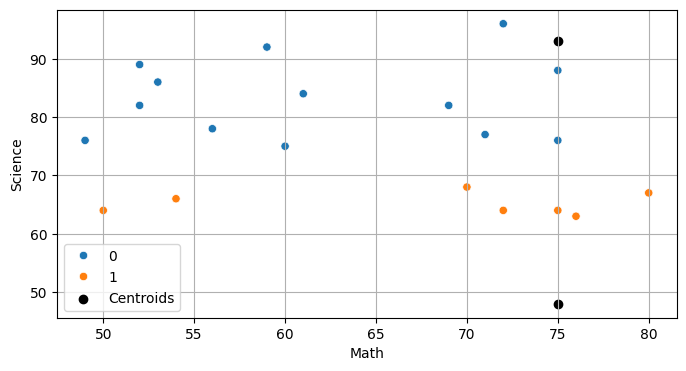

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(df,x="Math",y="Science",hue="Classes")
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids",color="black")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()
plt.show()


In [16]:
c1=df[df["Classes"]==0][["Math","Science"]].mean()
c2=df[df["Classes"]==1][["Math","Science"]].mean()

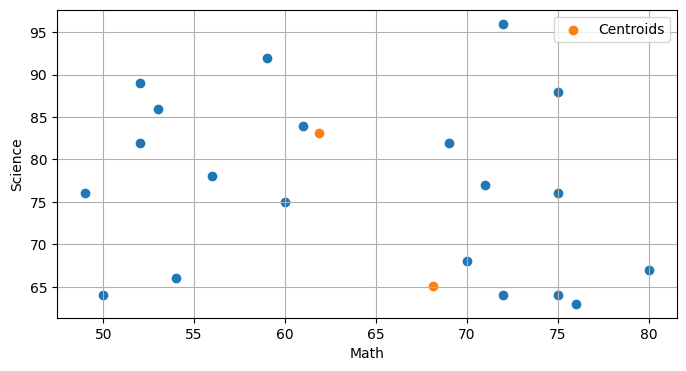

In [17]:
plt.figure(figsize=(8,4))
plt.scatter(df["Math"],df["Science"])
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()
plt.show()

In [18]:
dist_c1= np.sqrt(np.square(c1[0]-df["Math"])+np.square(c1[1]-df["Science"]))
dist_c2= np.sqrt(np.square(c2[0]-df["Math"])+np.square(c2[1]-df["Science"]))

df["Cluster1"]= dist_c1
df["Cluster2"]=dist_c2

classes= list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"],df["Cluster2"])))
df["Classes"]=classes

In [19]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,Classes
0,1,52,82,9.913531,23.339989,0
1,2,53,86,9.292741,25.774533,0
2,3,75,88,14.018162,23.863558,0
3,4,75,76,14.973349,12.841260,1
4,5,59,92,9.292741,28.370724,0
5,6,50,64,22.521127,18.178817,1
6,7,49,76,14.703781,22.007420,0
7,8,76,63,24.627401,8.144110,1
8,9,75,64,23.235608,6.951729,1
9,10,54,66,18.863101,14.168807,1


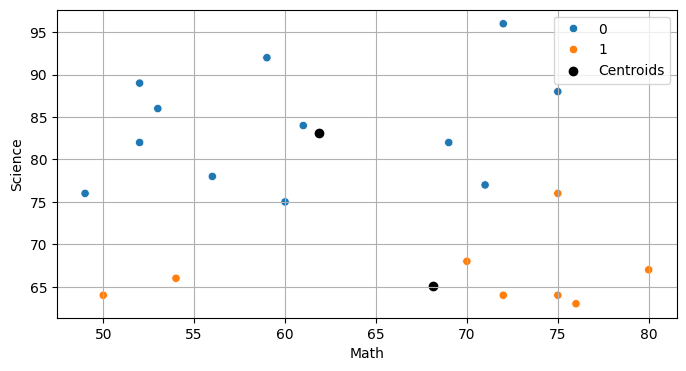

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(df,x="Math",y="Science",hue="Classes")
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids",color="black")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()
plt.show()

In [21]:
c1=df[df["Classes"]==0][["Math","Science"]].mean()
c2=df[df["Classes"]==1][["Math","Science"]].mean()

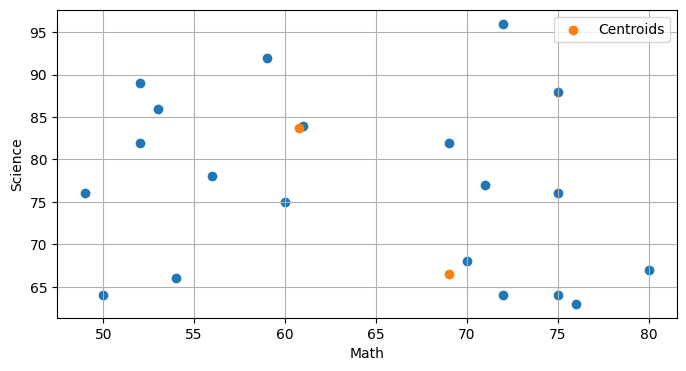

In [22]:
plt.figure(figsize=(8,4))
plt.scatter(df["Math"],df["Science"])
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()
plt.show()

In [23]:
dist_c1= np.sqrt(np.square(c1[0]-df["Math"])+np.square(c1[1]-df["Science"]))
dist_c2= np.sqrt(np.square(c2[0]-df["Math"])+np.square(c2[1]-df["Science"]))

df["Cluster1"]= dist_c1
df["Cluster2"]=dist_c2

classes= list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"],df["Cluster2"])))
df["Classes"]=classes

In [24]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,Classes
0,1,52,82,8.923284,23.005434,0
1,2,53,86,8.070006,25.223997,0
2,3,75,88,14.870272,22.321514,0
3,4,75,76,16.221128,11.236103,1
4,5,59,92,8.433564,27.390692,0
5,6,50,64,22.486107,19.163768,1
6,7,49,76,14.075688,22.141590,0
7,8,76,63,25.751214,7.826238,1
8,9,75,64,24.354158,6.500000,1
9,10,54,66,18.990129,15.008331,1


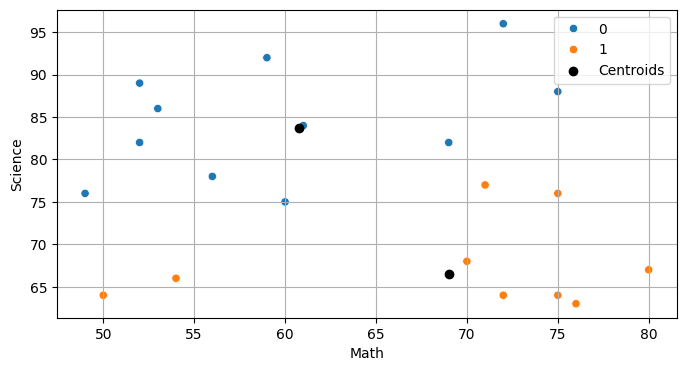

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(df,x="Math",y="Science",hue="Classes")
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids",color="black")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()
plt.show()

In [26]:
c1=df[df["Classes"]==0][["Math","Science"]].mean()
c2=df[df["Classes"]==1][["Math","Science"]].mean()

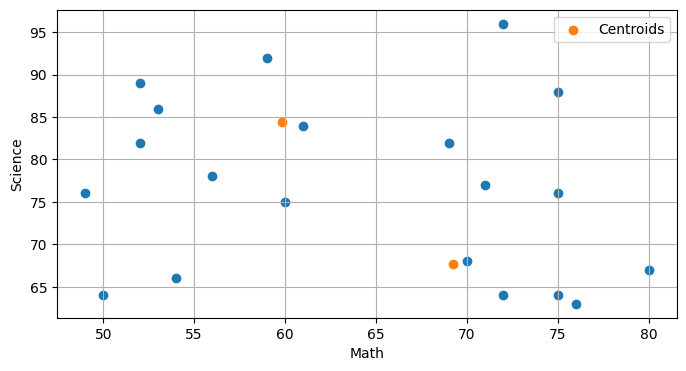

In [27]:
plt.figure(figsize=(8,4))
plt.scatter(df["Math"],df["Science"])
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()
plt.show()

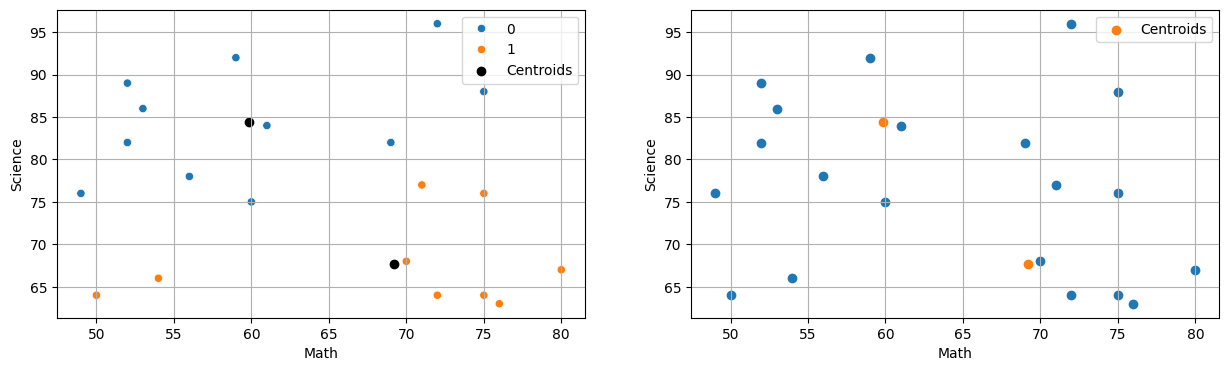

In [28]:
dist_c1= np.sqrt(np.square(c1[0]-df["Math"])+np.square(c1[1]-df["Science"]))
dist_c2= np.sqrt(np.square(c2[0]-df["Math"])+np.square(c2[1]-df["Science"]))

df["Cluster1"]= dist_c1
df["Cluster2"]=dist_c2

classes= list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"],df["Cluster2"])))
df["Classes"]=classes

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.scatterplot(df,x="Math",y="Science",hue="Classes")
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids",color="black")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()

c1=df[df["Classes"]==0][["Math","Science"]].mean()
c2=df[df["Classes"]==1][["Math","Science"]].mean()

plt.subplot(1,2,2)
plt.scatter(df["Math"],df["Science"])
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],label="Centroids")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid()
plt.legend()
plt.show()